In [10]:
import pickle 
import matplotlib.pyplot as plt
#import seaborn as sns 
import pandas as pd
import numpy as np
#import missingno as msno
import re

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Question: using a few X arrays to predict y (aircraft_damage) 

In [11]:
# read csv

filtered = pd.read_csv('../../Data/out.csv')
filtered.head(1)

,amateur,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,...,schedule,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,publication_date,event_month
0,0.0,20080109X00032,Accident,NYC08FA071,2007-12-30,"Cherokee, AL",United States,NaN,NaN,Fatal(3),...,NaN,Other Work Use,3,0,0,0,0,MANEUVERING,01/15/2009,12


Logistic Regression Model

In [12]:
# logistic regression
from sklearn.linear_model import LinearRegression

# fit X and y
X = filtered[['total_serious_injuries','total_fatal_injuries','total_minor_injuries', 'event_month']]
y = filtered['aircraft_damage']

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# instantiate the linear regression model 
reg = LogisticRegression()

# fit the model
reg.fit(X_train, y_train)

# prediction will change, depending on what value I will put into the bracket
prediction = reg.predict([[10,10,0, 7]]) # if there are total 10 fatal injuries, then aircraft is likely to be between 1 & 2, closer to 2
prediction

array([2])

In [13]:
X.columns

Index(['total_serious_injuries', 'total_fatal_injuries',
       'total_minor_injuries', 'event_month'],
      dtype='object')

In [14]:
print(f'train score: {reg.score(X_train, y_train)}')
print(f'test score: {reg.score(X_test, y_test)}')

train score: 0.8507297404736215
test score: 0.8489778534923339


In [15]:
print(reg.intercept_)
print(reg.coef_)

[-1.48725182  1.79768664 -0.31043482]
[[-0.07820627 -0.77789014  0.06142903 -0.00694775]
 [-0.39029326 -0.99345247 -0.08595367  0.0038556 ]
 [ 0.46849953  1.7713426   0.02452464  0.00309215]]


In [16]:
coefficient = reg.coef_
coefficient

array([[-0.07820627, -0.77789014,  0.06142903, -0.00694775],
       [-0.39029326, -0.99345247, -0.08595367,  0.0038556 ],
       [ 0.46849953,  1.7713426 ,  0.02452464,  0.00309215]])

In [17]:
y_pred = reg.predict(X)
y_pred

array([2, 2, 1, ..., 1, 2, 2])

In [18]:
# create residuals 
resids = y - y_pred
resids 

0       -1
1        0
2        0
3        0
4       -1
        ..
46953    0
46954    0
46955    0
46956    0
46957    0
Name: aircraft_damage, Length: 46958, dtype: int64

(array([   84.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         2488.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39928.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4458.]),
 array([-2.  , -1.94, -1.88, -1.82, -1.76, -1.7 , -1.64, -1.58, -1.52,
        -1.46, -1.4 , -1.34, -1.28, -1.22, -1.16, -1.1 , -1.04, -0.98,
        -0.92, -0.86, -0.8 , -0.74, -0.68, -0.62, -0.56, -0.5 , -0.44,
        -0.38, -0.32, -0.26, -0.2 , -0.14, -0.08, -0.02,  0.04,  0.1 ,
         0.16,  0.22,  0.28,  0.34,  0.4 ,  0.46,  0.52,  0.58,  0.64,
         0.7 ,  0.76,  0.82,  0.88,  0.94,  1.  ]),
 <BarContainer object of 50 artists>)

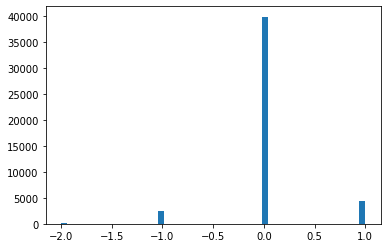

In [19]:
plt.hist(resids, bins = 50)

In [20]:
# compute the mse
mse = np.mean(resids ** 2)
mse

0.15507474764683335

In [21]:
# create the predictions for the null model
y_bar = np.mean(y)

In [22]:
# the null mse
null_mse = np.mean((y - y_bar) ** 2)
null_mse

0.23660037025745734

In [23]:
# the R^2
1 - mse / null_mse

0.3445709849139782

In [24]:
# evaluate the model using the above metrics
from sklearn import metrics
print(f'Train R2 score is: {reg.score(X_train, y_train)}')
print(f'Test R2 score is: {reg.score(X_test, y_test)}')

# evaluate with RMSE
pred = reg.predict(X_test)
print(pred)
rmse = (metrics.mean_squared_error(y_test, pred)) ** 0.5
print(f'RMSE is: {rmse}')

Train R2 score is: 0.8507297404736215
Test R2 score is: 0.8489778534923339
[2 1 1 ... 1 1 1]
RMSE is: 0.3980360645572777


In [25]:
from sklearn.metrics import classification_report

predictions = reg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       350
           1       0.85      0.96      0.90      8342
           2       0.85      0.64      0.73      3048

    accuracy                           0.85     11740
   macro avg       0.57      0.53      0.54     11740
weighted avg       0.82      0.85      0.83     11740



Using a combination of total injuries (minor, serious, and fatal) and event months, this models perform pretty well at predicting substantially damaged aircrafts. Overall, precision, recall, F1-score, and accuracy indicate that these variables can be useful when predicting aircraft damage levels. Combining this prediction model and the histogram examining the distribution of months and aircraft damages, FAA could enforce stricter policies. For example, more experienced staffs might be asked to accompany junior members during flights in winter. 

Baseline model

In [26]:
# running random forest on one parameter
X = filtered[['weather_condition']]
y = filtered['aircraft_damage']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42, stratify = y)

In [27]:
# baseline model
y.value_counts(normalize = True)
# 0 is minor, 1 is substantial, and 2 is destroyed

1    0.708016
2    0.263661
0    0.028323
Name: aircraft_damage, dtype: float64

In [28]:
mse = 0 
for i in y_train:
    residual = i - y.mean()
    mse += residual ** 2
rmse = mse ** 0.5

print(f'RMSE is: {rmse}')

RMSE is: 91.280224807944


The baseline model has an accuracy of 71% at predicting whether aircraft has been substantially damaged. The RMSE score is around 91%. If any of the models performs better than the base model, then this is considered to be a useful model.

Random forest model

In [29]:
# X is weather condition and y is aircraft damage
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42, stratify = y)

In [30]:
# random forest 
rf = RandomForestClassifier(n_estimators = 100)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X_train, y_train, cv = 5)
# close enough 

array([0.73353208, 0.73339012, 0.73126065, 0.7349141 , 0.74215533])

In [32]:
# grid search
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid = rf_params, cv = 5)

In [33]:
gs.fit(X_train, y_train)
print(gs.best_score_)

0.7350504562586779


In [34]:
gs.best_params_

{'max_depth': None, 'n_estimators': 100}

In [35]:
gs.score(X_train, y_train)

0.7350502583905957

In [36]:
gs.score(X_val, y_val)
# accuracy is around 74%, so this might not be a good x feature.

0.7364565587734242

In [37]:
from sklearn.metrics import classification_report

predictions = gs.predict(X_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.75      0.96      0.84      8312
           2       0.64      0.22      0.33      3095

    accuracy                           0.74     11740
   macro avg       0.46      0.39      0.39     11740
weighted avg       0.70      0.74      0.68     11740

/opt/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest on another parameter

In [38]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(filtered['broad_phase_of_flight'])
list(le.classes_)
filtered['broad_phase_of_flight'] = le.transform(filtered['broad_phase_of_flight'])
filtered['broad_phase_of_flight']

0         6
1         6
2         2
3         9
4         1
         ..
46953     2
46954     5
46955     9
46956    11
46957     2
Name: broad_phase_of_flight, Length: 46958, dtype: int64

In [39]:
# running random forest on another parameter
from sklearn.ensemble import RandomForestClassifier
X = filtered[['broad_phase_of_flight']]
y = filtered['aircraft_damage']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [40]:
clf = RandomForestClassifier(max_depth = 2, random_state = 0)

In [41]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [42]:
print(clf.predict([[6]]))

[1]


In [43]:
print(f'train score: {clf.score(X_train, y_train)}')
print(f'test score: {clf.score(X_test, y_test)}')

train score: 0.7080186268385484
test score: 0.7080068143100511


In [44]:
clf.feature_importances_

array([1.])

In [45]:
from sklearn.metrics import classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.71      1.00      0.83      8312
           2       0.00      0.00      0.00      3095

    accuracy                           0.71     11740
   macro avg       0.24      0.33      0.28     11740
weighted avg       0.50      0.71      0.59     11740

/opt/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# svm model
X = filtered[['broad_phase_of_flight', 'weather_condition', 'total_serious_injuries','total_fatal_injuries','total_minor_injuries']]
y = filtered['aircraft_damage']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
X.dtypes

broad_phase_of_flight     int64
weather_condition         int64
total_serious_injuries    int64
total_fatal_injuries      int64
total_minor_injuries      int64
dtype: object

In [48]:
# svm linear classifier
from sklearn.svm import SVC

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
# model accuracy
print(f'train score: {model.score(X_train, y_train)}')
print(f'test score: {model.score(X_test, y_test)}')

train score: 0.8499346924867965
test score: 0.8482112436115843


In [50]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       350
           1       0.85      0.97      0.90      8342
           2       0.86      0.62      0.72      3048

    accuracy                           0.85     11740
   macro avg       0.57      0.53      0.54     11740
weighted avg       0.82      0.85      0.83     11740

/opt/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# initialize svm classifier 
from sklearn import svm
clf_estimator_instance = svm.SVC(kernel = 'linear')

In [52]:
# fit data 
clf_estimator_instance = clf_estimator_instance.fit(X_train, y_train)

In [53]:
svm_indices = clf_estimator_instance.support_

In [54]:
clf_estimator_instance.score(X_train, y_train)

0.8499346924867965

In [55]:
clf_estimator_instance.score(X_test, y_test)

0.8482112436115843

Conclusions

Both logistic regression and SVM can be considered as good models for this classification problem. For this specific question, it is important for the model to correctly classify the models as minor, substantial, or destroyed. Depending on the severity of the damages and insurance companies, the coverage might be totally different. For aircrafts that are completely destroyed, insurance carriers might not willing to renew coverage or offering minimal policies limits with increases in rates for admitted and non-admitted carriers.  
FAA may consider to work along with some major aircraft insurance companies to minimize aircraft accidents and reduce financial loses. In the long term, it might be more cost effective to focus on cost prevention than post damaged repair for all parties involved. 

Future work

It would be interesting to look into historical loss ratios to see the changes insurers have endured year over year, in addition to the effectiveness of policy changes before/after, probability of policy success and failure.

Limitations

It would be great if I could find documentations explaining if these missing data from earlier years were due to 1) lack of reporting (actually a mix of safe and damaged), or 2) earlier flights were just safe.